In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import animation
import seaborn as sns
from IPython.display import HTML

display(HTML("""
<style>
.output {
        display: table-cell;
        text-align: center;
        vertical-align: middle;
    }
</style>
"""))


$$
\newcommand{\R}{\mathbb{R}}
\newcommand{\vec}[1]{\textbf{#1}}
\newcommand{\vecg}[1]{\boldsymbol{#1}}
\newcommand{\h}{h_{\vecg{\vecg\Theta}}}
\newcommand{\inner}[2]{\langle{#1},{#2}\rangle}
\newcommand{\pd}[1]{\frac{\partial}{\partial{#1}}}
$$


# Logistic Regression

## Classification Problems

Whenever we need to assign a category to something, e.g. is the person on a picture a man or a woman or is a tumor malicious of benign, etc., we are talking about a classification problem.

In classification problems, linear regression doesn't work, so we use something called **logistic regression**. 

We define our hypothesis as:
$$
\h = g(\vecg\Theta^T\vec X) = \frac{1}{1 + e^{-\vecg\Theta^T\vec X}}
$$

This gives us the following graph:

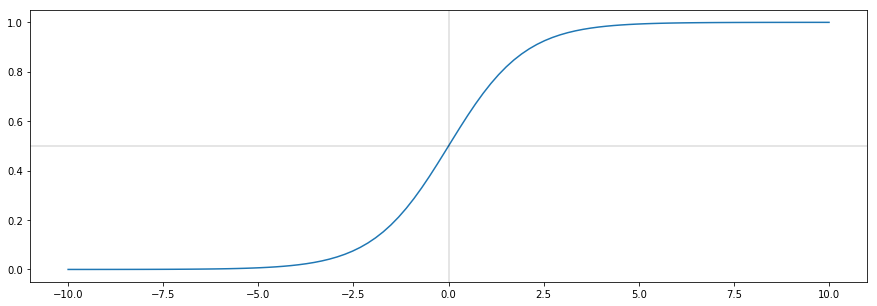

In [2]:
X = np.linspace(-10, 10, 100)
Y = 1 / (1 + np.exp(-X))
fig,ax = plt.subplots(1, 1, figsize=(15, 5))
sns.lineplot(x=X, y=Y)
ax.axhline(0.5, color='#00000022')
_ = ax.axvline(0, color='#00000022')

We can interpret this as the **probability** that our input lies within a given category. More specifically, if we define $y = 1$ to mean that $x$ belongs to category $A$ and $y = 0$ that $x$ belongs to category $B$:
$$
\h(x) = P(y = 1 \vert x ; \vecg\Theta)
$$

## Decision Bondary

Now, translating the continuous output of $\h$ to a discrete value is easy - we can take $h \ge 0.5$ to be $y = 1$ and $h < 0.5$ to be $y = 0$.

This results in a line $h = 0.5$ which separates the two categories - we call it the **decision boundary**. 

We can see that in the below graph:

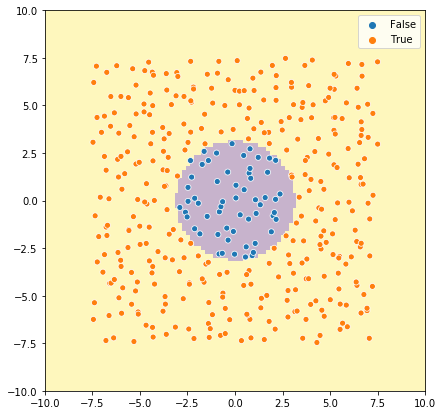

In [3]:
def f(x1, x2):
    return 1 / (1 + np.exp(10 - (x1 ** 2) - (x2 ** 2)))


x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
xx,yy = np.meshgrid(x, y)
y = f(xx, yy)

fig,ax = plt.subplots(1, 1, figsize=(15, 7))
ax.imshow(y >= 0.5, extent=(-10, 10, -10, 10), alpha=.3)

N = 20
X = np.linspace(-7, 7, N)
X1,X2 = np.meshgrid(X, X)
X1 += np.random.rand(N, N) - 0.5
X2 += np.random.rand(N, N) - 0.5
Y = f(X1, X2)
_ = sns.scatterplot(x=X1.reshape(-1), y=X2.reshape(-1), hue=Y.reshape(-1) > 0.5, ax=ax)

## Cost Function

If we use the same cost function as the one for linear regression - mean squared error - we would get a non-convex function - that is a function with more than one local extrema, which means that gradient descent won't converge to the minimum.

Hence we use the following:
$$
Cost(\h(x), y) =
\begin{cases}
-\ln{\h(x)} & y = 1 \\
-\ln{(1 - \h(x))} & y = 0
\end{cases}
$$

On a graph, this looks like the following:

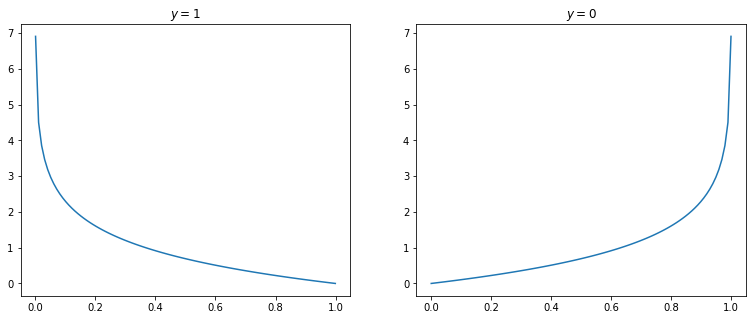

In [4]:
X = np.linspace(0.001, 0.999, 100)
Y1 = -np.log(X)
Y0 = -np.log(1 - X)
fix,ax = plt.subplots(1, 2, figsize=(13, 5))
ax[0].set_title('$y=1$')
ax[1].set_title('$y=0$')
sns.lineplot(x=X, y=Y1, ax=ax[0])
_ = sns.lineplot(x=X, y=Y0, ax=ax[1])

We can see that when $y=1$ the cost function is minimzed at $1$ and vice versa.

Exploiting the fact that $y \in \{0, 1\}$, we can represent our cost function in a single expression:

$$
Cost(\h(x), y) = -y\ln{\h(x)} -(1-y)\ln{[1 - \h(x)]}
$$

Summing for all the observations in $\vec X$, we get:
$$
J(\vecg\theta) = \frac{1}{m}\sum_i^n{Cost(\h(x_i), y_i)} = -\frac{1}{m}\sum_i^n{y\ln{\h(x_i)} +(1-y)\ln{[1 - \h(x_i)]}}
$$

This can be represented by dot products:

$$
J(\vecg\theta) = \frac{1}{m}\big[ \inner{\vec y}{\ln\vec h} + \inner{1 - \vec y}{\ln(1 - \vec h)} \big]
$$

Notice that the above is the formula for a single output $y$.

## Gradient Descent

$$
\def\T{\vecg\Theta}
$$

We can apply gradient descent in the same way as in linear regression in order to minimze our cost function. However, first we need to compute the gradient.

Let us start by computing $\pd{\theta^k_j}\h^k(\vec x)$.

$$
\def\pdj{\pd{\theta^k_j}}
\begin{align}
\pdj\h^k(\vec x) &= \pd{\theta^k_j} \frac{1}{1 + e^{-\inner{\vecg\theta^k}{\vec x}}} \\
&= \pdj \frac{1}{1 + \exp{\inner{-\vecg\theta^k}{\vec x}}} \\
&= \pdj \big[1 + \exp{\inner{-\vecg\theta^k}{\vec x}}\big]^{-1} \\
&= -\big[1 + \exp{\inner{-\vecg\theta^k}{\vec x}}\big]^{-2} \cdot \pdj\exp\inner{-\vecg\theta^k}{\vec x} \\
&= -\big[1 + \exp{\inner{-\vecg\theta^k}{\vec x}}\big]^{-2} \cdot \exp\inner{-\vecg\theta^k}{\vec x} \cdot \pdj\inner{-\vecg\theta^k}{\vec x} \\
&= -\big[1 + \exp{\inner{-\vecg\theta^k}{\vec x}}\big]^{-2} \cdot \exp\inner{-\vecg\theta^k}{\vec x} \cdot -x_j \\
&= \frac{x_j \exp\inner{-\vecg\theta^k}{\vec x}}{1 + \exp{\inner{-\vecg\theta^k}{\vec x}}} \\
&= x_j \exp\inner{-\theta^k}{\vec x}{\h^k}^2(\vec x)
\end{align}
$$


Now let's compute $\pdj Cost$.

$$
\begin{align}
\pdj Cost(\h^k(\vec x), y^k) &= -\frac{y^k}{\h^k(\vec x)} \cdot \pdj\h^k(\vec x) - \frac{1 - y^k}{1 - \h^k(\vec x)} \cdot \pdj[1 - \h^k(\vec x)] \\
&= -\frac{y^k}{\h^k(\vec x)}\cdot\pdj\h^k(\vec x) + \frac{1 - y^k}{1 - \h^k(\vec x)}\cdot\pdj\h^k(\vec x) \\
&= \pdj\h^k(\vec x) \bigg[ \frac{-y^k[1 - \h^k(\vec x)] + [1 - y^k]\h^k(\vec x)}{\h^k(\vec x)[1 - \h^k(\vec x)]} \bigg] \\
&= \pdj\h^k(\vec x) \bigg[ \frac{\h^k(\vec x) - y^k}{\h^k(\vec x)[1 - \h^k(\vec x)]} \bigg] \\
&= x_j \exp\inner{-\theta^k}{\vec x}{\h^k(\vec x)}^2 \frac{\h^k(\vec x) - y^k}{\h^k(\vec x)[1 - \h^k(\vec x)]} \\
&= x_j \exp\inner{-\theta^k}{\vec x} \frac{\h^k(\vec x)}{1 - \h^k(\vec x)} [ \h^k(\vec x) - y^k ] \\
&= x_j \exp\inner{-\theta^k}{\vec x} \frac{1}{\exp\inner{-\theta^k}{\vec x}} [ \h^k(\vec x) - y^k] \\
&= x_j(\h^k(\vec x) - y^k)
\end{align}
$$


Summing over all the observations in $\vec X$, we get the derivative of our cost function:

$$
\pdj J^k(\theta^k) = \frac{1}{m}\sum_i^n{\big[ \h^k(\vec x^i) - \vec y^i_k \big]\vec x^i_j}
$$

Using this, we can now define $\nabla J^k$:

$$
\nabla J^k(\theta^k) = \frac{1}{m}\begin{pmatrix}
\sum_i^n{\big[ \h^k(\vec x^i) - \vec y^i_k \big]\vec x^i_0} \\
\vdots \\
\sum_i^n{\big[ \h^k(\vec x^i) - \vec y^i_k \big]\vec x^i_m}
\end{pmatrix} \\
$$

Let $\vec e = \h^k(\vec x) - \vec y_k$, and substitute:

$$
\nabla J^k(\theta^k) = \frac{1}{m}
\begin{pmatrix}
\sum_i^n{\vec e_i \vec x^i_0} \\
\vdots \\
\sum_i^n{\vec e_i \vec x^i_m}
\end{pmatrix} \\
$$

This is a matrix product, which we can rewrite as:

$$
\nabla J^k(\theta^k) = \frac{1}{m}\vec e \vec X^T, \text{where } \vec e \in \R^n \text{ and } \vec X \in \R^{n\times m}
$$

which can be generalized for multivariate output:

$$
\nabla J(\vecg\Theta) = \frac{1}{m}\vec E \vec X^T = \frac{1}{m}(\h(\vec X) - \vec Y)\vec X^T
$$

Finally, plugging this into gradient descent, we have:

$$
\vecg\Theta := \vecg\Theta - \alpha\cdot(\h(\vec X) - \vec Y)\vec X^T
$$

# Example

In [5]:
%matplotlib agg
def h(X, theta):
    return 1 / (1 + np.exp(-X @ theta))

def dJ(X, Y, theta):
    return X.T @ (h(X, theta) - Y)

def J(X, Y, theta):
    p = h(X, theta)
    c = Y * np.log(p) + (1 - Y)*np.log(1 - p)
    return -np.sum(c, axis=0) / X.shape[1]

N = 10
data = pd.DataFrame()
data['x0'] = np.ones(N ** 2)
x = np.linspace(-1.5, 1.5, N)
x,y = np.meshgrid(x,x)
data['x1'] = x.reshape(-1)
data['x2'] = y.reshape(-1)
data['y'] = data['x1'] > 0
X = data[['x0', 'x1', 'x2']].to_numpy()
Y = data['y'].to_numpy()

alpha = .005
theta = np.array([0, 1, -1])
thetas = [theta]
I = 100
for i in range(I):
    theta = theta - alpha * dJ(X, Y, theta)
    thetas += [theta]

fig,ax = plt.subplots(1, 1, figsize=(10, 7))

def animate(i):
    i = np.floor(i * I / FRAMES).astype(int)
    theta = thetas[i]
    n = 100
    xx = np.linspace(-1.5, 1.5, n)
    x1,x2 = np.meshgrid(xx, xx)
    yy = np.round(h(np.stack([np.ones((n, n)), x1, x2]).T, theta)).T
    
    ax.clear()
    ax.imshow(yy < 0.5, extent=(-1.6, 1.6, -1.6, 1.6), alpha=.2)
    sns.scatterplot(x=data['x1'], y=data['x2'], hue=data['y'], ax=ax)
FRAMES = 8
anim = animation.FuncAnimation(fig, animate, frames=FRAMES, interval=500)
plt.close()
HTML(anim.to_html5_video())